# <font color= 'blue'> Project: High Value Customer Identification (Insiders)</font>


## Business Challange

A loyalty program of customers to increase sales frquency.

## Business Planning (IOT)

### Input 
    1. Business Problem
        - Select the most valuable customers to join a loyalty program.
    
    2. Dataset
        - One year e-commerce sales.
        Invoice No: Invoice number (A 6-digit integral number uniquely assigned to each transaction)

        Stock Code: Product (item) code

        Description: Product (item) name

        Quantity: The quantities of each product (item) per transaction

        Invoice Date: The day when each transaction was generated

        Unit Price: Unit price (Product price per unit)

        Customer ID: Customer number (Unique ID assigned to each customer)

        Country: Country name (The name of the country where each customer resides)
    
### Output
    1. Indicate customers who will be part of a loyalty program called Insiders.
            - List: client_id | is_insider
                        10323 |   yes
                        32413 |   no
    2. A report with the answers for the business questions.
    - Who are the customers eligible to join the program?
    - How many customers will be part os this group?
    - What are the main characteristics of these customers?
    - What is the contribution percentage revenue from Insiders?
    - What is the group's revenue expectation for the coming months?
    - What are the condictions for select customers to join Insiders?
    - What are the condictions for removing Insiders customers?
    - What is the guarantee that the Insiders program is better than the rest of the base?
    - What actions can the marketing team take to increase revenue?
    
### Taks
    1. Who are the customers eligible to join the program?
        - What does it mean, to be elegible? What does high-value customers mean?
             - Revenue: ticket, bascket size, high LTV (Lifetime Value), churn probability,high TVC prevision, purchasing propensity.
             - Cost: lower return rate.
             - Purchase experience: high average evaluation rate.
     
    2. How many customers will be part os this group?
        - Total nambers of customers.
        - % Insiders group.
        
    3. What are the main characteristics of these customers?
        - Age
        - Location
        - Others characteristics.
        - Ticket, bascket size, high LTV, churn probability,high TVC prevision, purchasing propensity.
        
    4. What is the contribution percentage revenue from Insiders?
         - Total revenue for the year.
         - Insiders group revenue.
         
    5. What is the group's revenue expectation for the coming months?
        - LTV Insisders group.
        - Cohort analysis.
        
    6. What are the condictions for select customers to join Insiders?
        - Define the periodicity
        - The person needs to have similar characteristics with someone in the group.
    
    7. What are the condictions for removing Insiders customers?
        - Define the periodicity
        - The person doen't need to have similar characteristics with someone in the group.
        
    8. What is the guarantee that the Insiders program is better than the rest of the base?
        - A/B test
        - A/B bayesian test
        - Hypothesis test
        
    9. What actions can the marketing team take to increase revenue?
        - Discont
        - Purchase preference
        - Purchase shipping
        - Company visit  
        
## Benchmark Solutions

###  Desk Research
 - RFM model (recency, frequency,, monetary): sorted data to have a RFM Score.
 
     Recency: How recently a customer has made a purchase
     
     Frequency: How often a customer makes a purchase
     
     Monetary Value: How much money a customer spends on purchases
     

 - example project: https://guillaume-martin.github.io/rfm-segmentation-with-python.html

# 0.0. Imports

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import Image, HTML
from datetime import datetime
from sklearn import cluster as c


## 0.1. Helper Functions

In [103]:
 def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings() 
    

Populating the interactive namespace from numpy and matplotlib


/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 0.2. Load dataset

In [104]:
# load data
df_raw = pd.read_csv('/Users/anaotavio/Documents/repos/insiders/data/Ecommerce.csv')

# drop extra column
df_raw = df_raw.drop(columns = ['Unnamed: 8'], axis = 1)

# 1.0. Data Description

In [105]:
df1 = df_raw.copy()

## 1.1. Rename columns

In [106]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']
df1.columns = cols_new

## 1.2. Data dimensions

In [107]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 541909
Number of Columns: 8


## 1.3. Data types

In [108]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [109]:
df1['invoice_no'] = df1['invoice_no'].astype(int)

ValueError: invalid literal for int() with base 10: 'C536379'

In [110]:
df1['stock_code'] = df1['stock_code'].astype(int)

ValueError: invalid literal for int() with base 10: '85123A'

## 1.4. Check NA

In [111]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [112]:
# remove na
df1 = df1.dropna(subset = ['description', 'customer_id'])
print('Removed data:{:.2f}'.format (1-(df1.shape[0]/df_raw.shape[0])))

Removed data:0.25


In [113]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change dtypes

In [117]:
# invoice_date
df1["invoice_date"] = pd.to_datetime(df1["invoice_date"],infer_datetime_format=True)

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [115]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


## 1.7. Descriptive Statistics

# 2.0. Feature Engineering

In [189]:
df2 = df1.copy()

## 2.1. Feature Creation

In [190]:
# data reference
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country'],
                   axis =1 ).drop_duplicates( ignore_index = True)

# Gross Revenue: quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how = 'left')


# Recency (Last Day Purchase)
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max()- df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on = 'customer_id', how = 'left')

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how ='left')

In [188]:


df_ref.head()

,customer_id,gross_revenue,invoice_date,recency_days
0,17850,5288.63,2017-02-08,302
1,13047,3079.10,2017-11-06,31
2,12583,7187.34,2017-12-05,2
3,13748,948.25,2017-09-03,95
4,15100,635.10,2017-01-11,330


# 3.0. Data Filtering

In [200]:
df3 = df_ref.copy()

# 4.0. Exploratory Data Analysis (EDA)

In [201]:
df4 = df3.copy()

# 5.0. Data Preparation

In [202]:
df5 = df4.copy()

# 6.0. Feature Selection

In [203]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine Tunning

In [217]:
X = df6.drop(columns = ['customer_id'])

In [218]:
clusters = [2, 3, 4, 5, 6]

## 7.1. Within-Cluster Sum os Square (WSS)

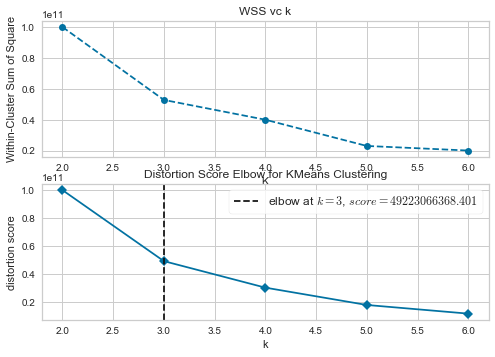

In [236]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_)
    

plt.subplot(2, 1, 1 )
# Plot wss - Elbow Method
plt.plot(clusters, wss, linestyle='--', marker = 'o', color='b')
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vc k')

plt.subplot(2, 1, 2 )
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False)
kmeans.fit( X)
kmeans.show()

plt.show()



## 7.2. Sillhouette Score

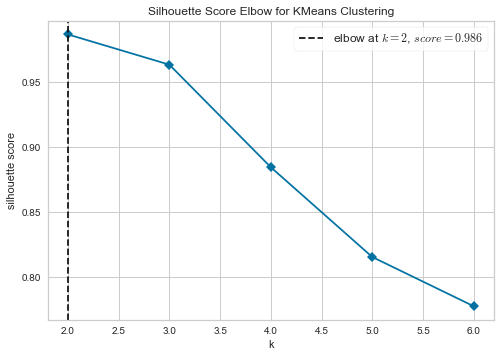

In [237]:
# sillhouette is better than Elbow Method.
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit( X)
kmeans.show()


# 8.0. Model Training

# 9.0. Cluster Analysis

# 10.0. Deploy to Production